In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import  matplotlib.pyplot  as  plt
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
### Read the time series data

univariate_series   =  pd.read_csv('./data/daily-min-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

### Print first five records
univariate_series.head()

/var/folders/6y/6q90_6fx451bhd6kbn9ly_f40000gn/T/ipykernel_92105/147658007.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  univariate_series   =  pd.read_csv('./data/daily-min-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

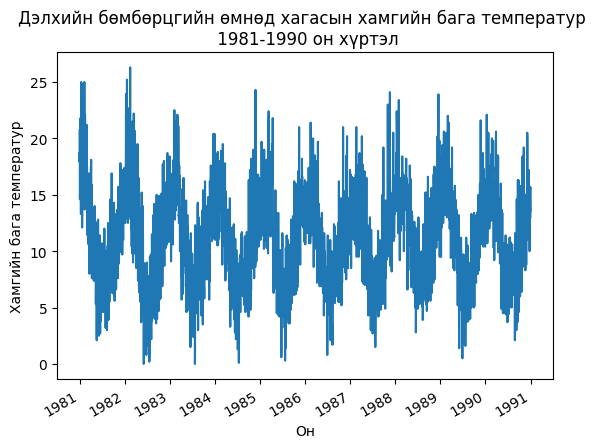

In [6]:
univariate_series.plot()
plt.ylabel('Хамгийн бага температур')
plt.title('Дэлхийн бөмбөрцгийн өмнөд хагасын хамгийн бага температур \n 1981-1990 он хүртэл')
plt.xlabel('Он')
plt.show()

In [13]:
# process the date time information 

from datetime import datetime
def parse(x):
    return datetime.strptime(x,'%Y %m %d %H')

# Load dataset
pollution_df = pd.read_csv("./data/pollution.csv",parse_dates = [['year', 'month', 'day', 'hour']],index_col=0, date_parser=parse)
pollution_df.drop('No', axis=1, inplace=True)
# manually specify column names

pollution_df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
pollution_df.index.name = 'date'

# mark all NA values with 0
pollution_df['pollution'].fillna(0, inplace=True)

# drop the first 24 hours
pollution_df = pollution_df[24:]

# summarize first 5 rows
print(pollution_df.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [16]:
listt=['бохирдол', 'шүүдэр цэг', 'температур', 'даралт', 'салхины чиг', 'салхины хурд', 'цас', 'бороо']

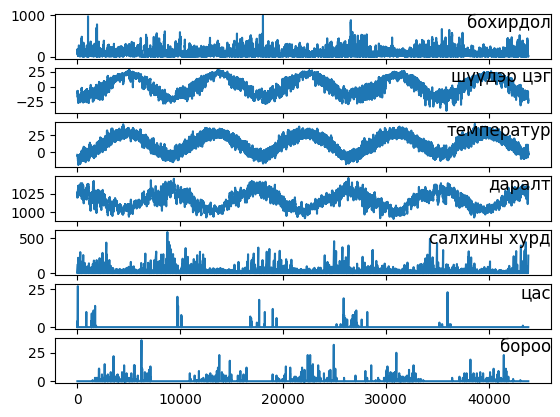

In [17]:
values = pollution_df.values

# specify columns to plot

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

# plot each column
plt.figure()

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(listt[group], y=0.5, loc='right')
    i += 1
    
plt.show()
